#### 1. Import metastim

In [13]:
from metastim import field_ann, axon_ann
from metastim.utils import MetaStimUtil
from metastim import visualization as vis
import numpy as np

#### 2. Inputs

In [14]:
electrode_list = [1, 0, 0, 0, 1, 0, 0, 0]

num_axons = 10
axon_diameter = 6
min_distance = 1
max_distance = 5
lead_id  = '6172'
pulse_width = 90
stimulation_amp = 3


lead_radius = MetaStimUtil.get_lead_radius(lead_id, electrode_list)

inl = 100 * axon_diameter / 1e3 # distance between nodes on an axon
z_base = np.arange(-5, 16, inl)
num_axon_nodes = z_base.shape[0]



x_axon = np.repeat(np.linspace(min_distance, max_distance, num=num_axons), num_axon_nodes).reshape(num_axon_nodes, num_axons, order='F') + lead_radius
y_axon = np.zeros(x_axon.shape)
z_axon = np.repeat(z_base, num_axons).reshape(num_axon_nodes, num_axons)



#### 2. Inputs

In [15]:
lead_id = '6172' 
electrode_list = [1, 0, 0, 0, 0, -1, 0, 0]
stimulation_amp = 3 # [V]
pulse_width = 90 #[us]
num_axons = 10
min_distance = 1
max_distance = 5
axon_diameter = 6 # [um]

#### 3. Create field_ann_model , axon_ann_model by passing all required inputs

In [16]:
field_ann_model = field_ann.FieldANN(electrode_list)
phi_axon = field_ann_model.field_ann(x_axon, y_axon, z_axon)

axon_ann_model = axon_ann.AxonANN(electrode_list, pulse_width, stimulation_amp, num_axons, axon_diameter)
axon_act = axon_ann_model.axon_ann(x_axon, y_axon, z_axon, lead_radius)

2/2 [==============================] - 0s 2ms/step


/home/anjan/data/python/projects/metaStim/venv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


2/2 [==============================] - 0s 3ms/step


/home/anjan/data/python/projects/metaStim/venv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


1/1 [==============================] - 0s 54ms/step


/home/anjan/data/python/projects/metaStim/venv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


#### 4. Create instance of visualization for plot

In [17]:
visual_demo = vis.Visualization(lead_id, stimulation_amp, num_axons, x_axon, z_axon, phi_axon, axon_act)


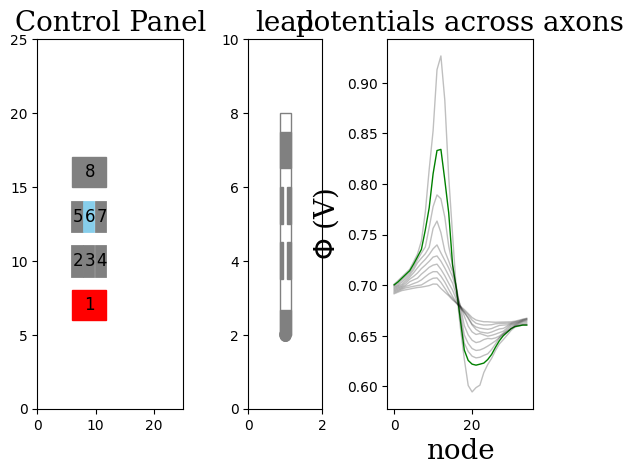

In [18]:
visual_demo.visualize(electrode_list)